In [1]:
#Question 1

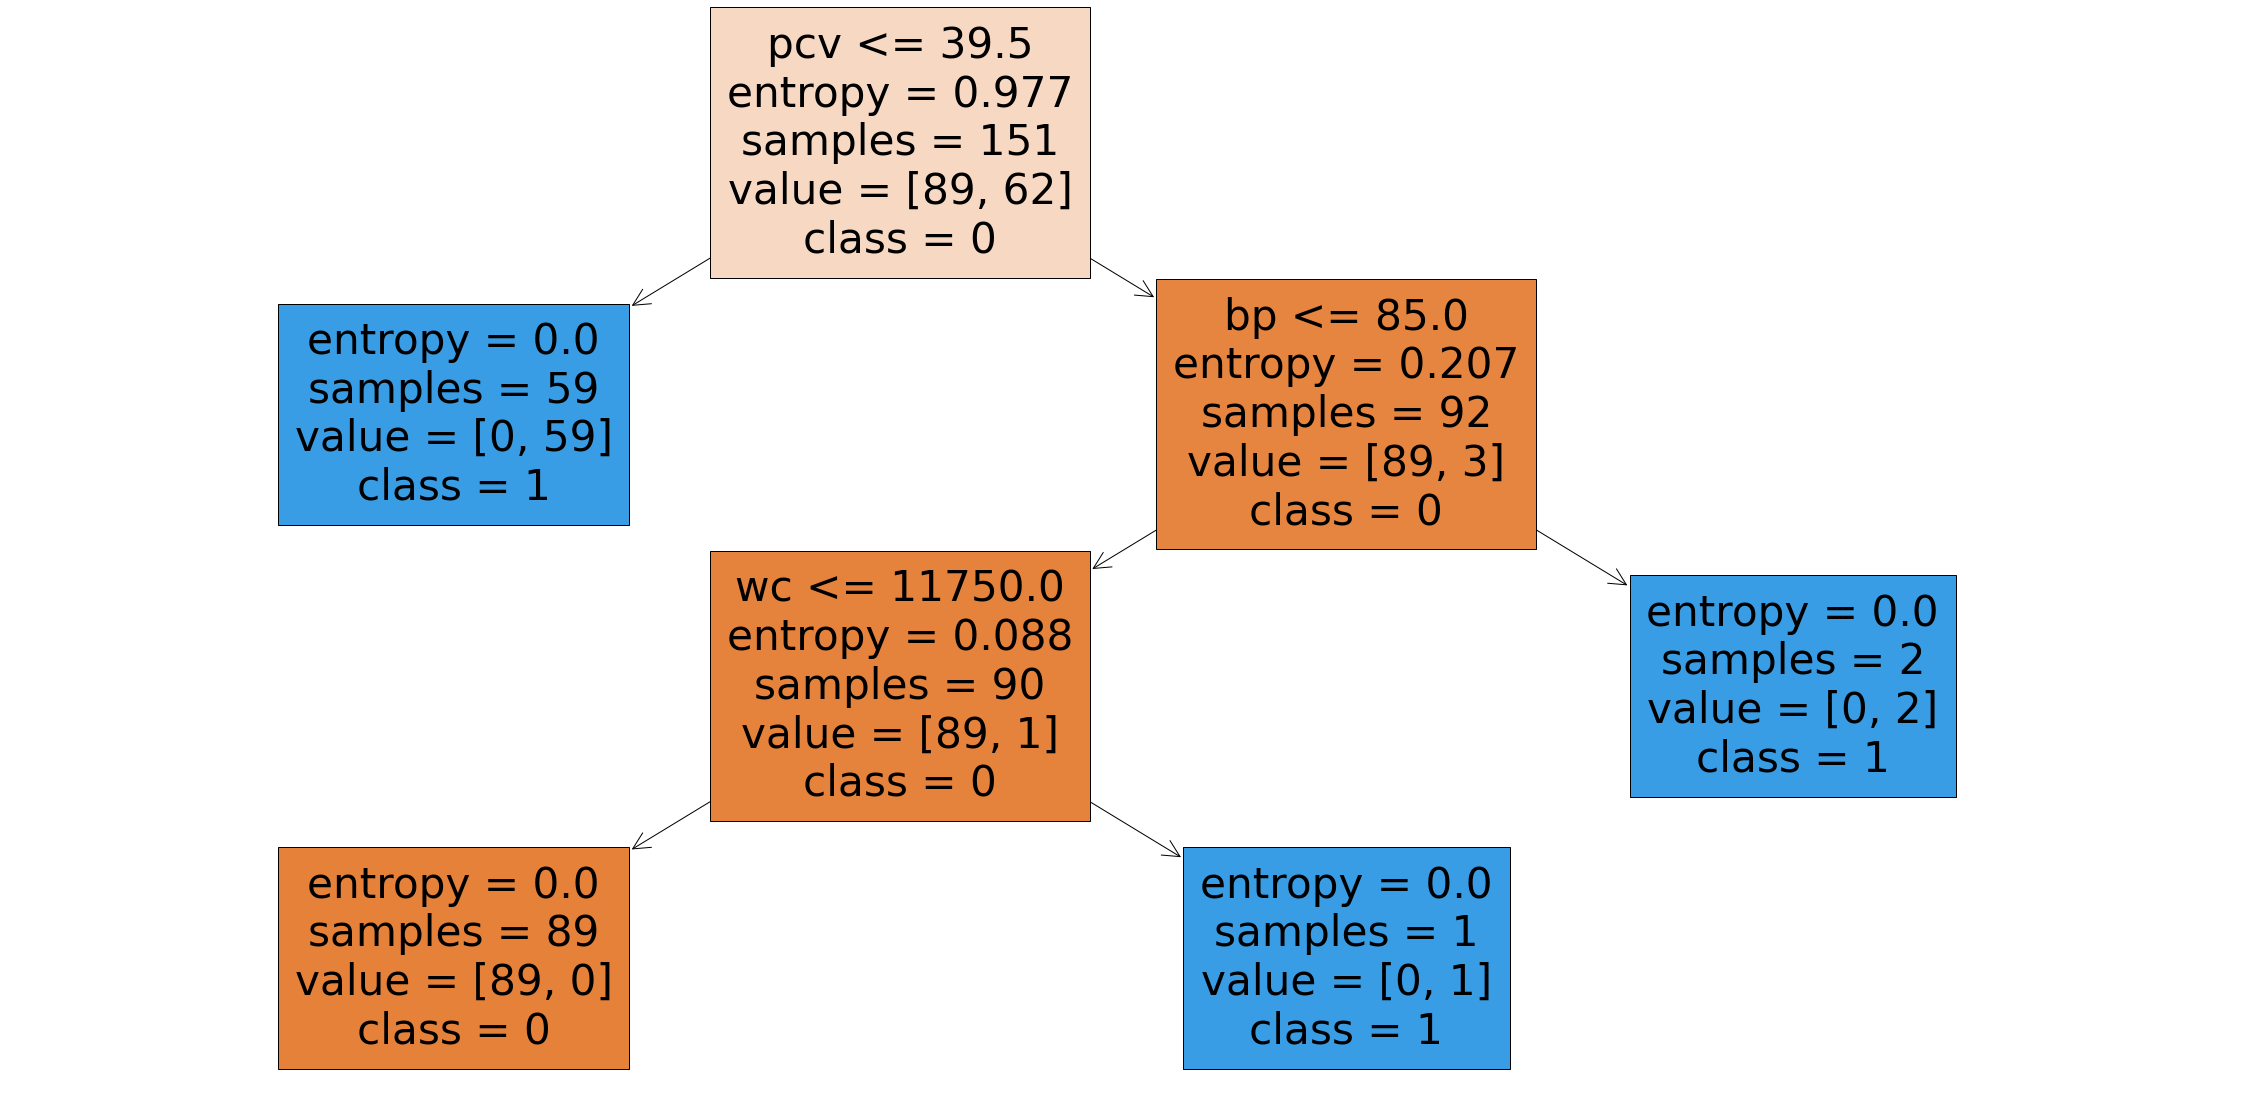

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

data = pd.read_csv('/Users/bryannicholson/Downloads/kidney_disease.csv')

X, y = data.drop(['ckd'],axis=1), data[['ckd']]

feature_names = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

model = DecisionTreeClassifier(criterion = 'entropy') 
model.fit(X_train, y_train)


fig = plt.figure(figsize=(40,20))
fig = tree.plot_tree(model, feature_names=feature_names,
class_names=['0','1'], filled=True)
plt.savefig('tree.pdf')

In [19]:
#Person A is Class 1. Therefore they have Chronic Kidney Disease
#Person B is Class 0. Therefore they don't have the disease.

In [2]:
#Question 2

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_diabetes
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

model = Sequential()
tf.random.set_seed(1)

input_layer = InputLayer(input_shape=(2,))
model.add(input_layer)
hidden_layer = Dense(3)
model.add(hidden_layer)

# load dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


scaler = MinMaxScaler()
y = y.reshape(-1,1)
y = scaler.fit_transform(y)

model.compile(loss='binary_crossentropy')

output_layer = Dense(1, activation='sigmoid')
model.add(output_layer)

model.fit(X, y, epochs=10)


In [3]:
#Question 3 - Do not complete

In [4]:
#Question 4

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
number_of_training_instances = X_train.shape[0]
number_of_testing_instances = X_test.shape[0]
X_train = X_train.reshape((number_of_training_instances, 28*28))
X_test = X_test.reshape((number_of_testing_instances, 28*28))

In [7]:
tf.random.set_seed(1)
model = Sequential()

input_layer = InputLayer(input_shape=(28*28))
model.add(input_layer)

hidden_layer = Dense(28*28/2)
model.add(hidden_layer)

output_layer = Dense(10, activation='softmax')
model.add(output_layer)



In [9]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [10]:
model.compile(loss='categorical_crossentropy', 
              metrics = ['accuracy'])

In [11]:
X_train.shape

(60000, 784)

In [12]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 23.9265 - accuracy: 0.8398
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.8752 - accuracy: 0.8439
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.0021 - accuracy: 0.8501
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.7278 - accuracy: 0.8562
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.7106 - accuracy: 0.8603
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.6172 - accuracy: 0.8624
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.5678 - accuracy: 0.8646
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.5593 - accuracy: 0.8674
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.5639 - accuracy: 0.8676
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 3.57

In [13]:
y_pred=model.predict(X_test)
y_pred

313/313 [==============================] - 0s 1ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.2131521e-30],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 4.5971446e-17, ..., 6.2418714e-22,
        3.4729091e-20, 6.4899131e-33],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 6.0594402e-36,
        6.2498496e-23, 1.2632990e-30],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [14]:
performance=model.evaluate(X_test, y_test)
print(performance[1])

313/313 [==============================] - 1s 1ms/step - loss: 2.9864 - accuracy: 0.8843
0.8842999935150146


In [15]:
model.save('digits_model.h5')